<a href="https://colab.research.google.com/github/lucasjirwin/Tree-Story-Cassini-Hackathon/blob/main/Does%20the%20Tree%20Exist!.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [5]:
from osgeo import gdal,osr
import numpy as np
import matplotlib.pyplot as plt
# Read in the Tree Density data from Copernicus Satellite
ds = gdal.Open("tree_density.tif")
gt = ds.GetGeoTransform() # Check the coordinate system 
gt # 6400000.0 bottom left x-value, 1700000.0 bottom left y-value 



(6400000.0, 10.0, 0.0, 1700000.0, 0.0, -10.0)

In [6]:
proj = ds.GetProjection() #Check the coordinate system - it's not Longitude and Latitude!
proj

'PROJCS["ETRS_1989_LAEA",GEOGCS["ETRS89",DATUM["European_Terrestrial_Reference_System_1989",SPHEROID["GRS 1980",6378137,298.2572221010042,AUTHORITY["EPSG","7019"]],AUTHORITY["EPSG","6258"]],PRIMEM["Greenwich",0],UNIT["degree",0.0174532925199433],AUTHORITY["EPSG","4258"]],PROJECTION["Lambert_Azimuthal_Equal_Area"],PARAMETER["latitude_of_center",52],PARAMETER["longitude_of_center",10],PARAMETER["false_easting",4321000],PARAMETER["false_northing",3210000],UNIT["metre",1,AUTHORITY["EPSG","9001"]],AUTHORITY["EPSG","3035"]]'

In [7]:
band = ds.GetRasterBand(1) # Extract the band from the image 

In [8]:
array = band.ReadAsArray() # Store the image as an array

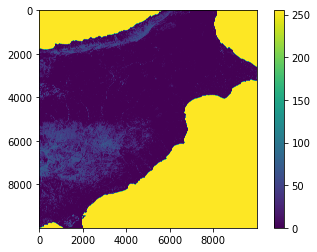

In [9]:
# Plot the image with the color gradient 
# Color between 25 and 200 indicates tree density
# We confirmed this by opening the file in the ESA SNAP general user interface 
# https://step.esa.int/main/download/snap-download/
plt.figure()
plt.imshow(array)
plt.colorbar()

In [10]:
# Converted the coordinate system to Longitude and Latitude
dsReprj = gdal.Warp("tree_density_new.tif", ds, dstSRS= "EPSG: 4326")

In [12]:
dsReprj.GetGeoTransform() # Confirmed! Bottom Left Latitude: 32.79...,
# Bottom Left Longitude: 35.52..

(32.796176907358934,
 9.7008630156458e-05,
 0.0,
 35.524513406918814,
 0.0,
 -9.7008630156458e-05)

In [13]:
dsReprj.GetProjection() # Confirmed Change

'GEOGCS["WGS 84",DATUM["WGS_1984",SPHEROID["WGS 84",6378137,298.257223563,AUTHORITY["EPSG","7030"]],AUTHORITY["EPSG","6326"]],PRIMEM["Greenwich",0,AUTHORITY["EPSG","8901"]],UNIT["degree",0.0174532925199433,AUTHORITY["EPSG","9122"]],AUTHORITY["EPSG","4326"]]'

In [44]:
# Calculate the number of pixels in the X direction
# And the number of pixels in the Y direction 
X_pixels = dsReprj.RasterXSize
Y_pixels = dsReprj.RasterYSize
print(X_pixels)
print(Y_pixels)

13782
11734


In [20]:
import rasterio as rio 

In [21]:
# Read in new file with correct Coordinate system 
ra = rio.open("tree_density_new.tif")
# Calculate the bounding box for this file 
bounds  = ra.bounds

In [40]:
bounds # Bounding box for sample tif file 

BoundingBox(left=32.796176907358934, bottom=34.386214140662936, right=34.133149848175236, top=35.524513406918814)

In [79]:
# Function to convert latitude and longitude coordinates to the pixels in 
# the image
def convert2pixel(lat, lon):
  x_val = (int) (((lat - bounds[0])/ (bounds[2] - bounds[0])) * X_pixels)
  y_val = (int) (((lon - bounds[1])/ (bounds[3] - bounds[1])) * Y_pixels)
  return x_val, y_val



In [83]:
# Confirmed that the bottom left latitude and longitude coordinates
# corresponds to the first pixel in the image  
convert2pixel(32.796176907358934,34.386214140662936  ) 

(0, 0)

In [99]:
# Function to check if a tree exists at the specified latitude and longitude! 
def DoesTreeExist(lat, lon): 
  x_val, y_val = convert2pixel(lat,lon)
  if ((array[x_val][y_val] > 25) and (array[x_val][y_val] < 200)):
     return "Hello! Nice to meet you! I'm your friendly tree, share my story!"
  else:
     return "Oh no! This is not a tree!"

DoesTreeExist(33.286176907358934, 34.546214140662936)

"Hello! Nice to meet you! I'm your friendly tree, share my story!"